In [1]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro, levene,f_oneway, kruskal
df = pd.read_csv("datasets/netflixData.csv").copy()
pd.set_option ('display.max_columns',None)
pd.set_option("display.width",500)

In [2]:
# Check data

df.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [3]:
df.shape

(5967, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [5]:
df.drop(["Show Id"],axis=1, inplace=True)

In [6]:
df.isnull().sum()

Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().values.any()

False

In [9]:
# Change the naming of variables

df.columns = [col.replace(" ","_") for col in df.columns]
df.head()

,Title,Description,Director,Genres,Cast,Production_Country,Release_Date,Rating,Duration,Imdb_Score,Content_Type,Date_Added
1,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
5,#FriendButMarried,"Pining for his high school crush for years, a ...",Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
6,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,Rako Prijanto,"Dramas, International Movies, Romantic Movies","Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"
7,#realityhigh,When nerdy high schooler Dani finally attracts...,Fernando Lebrija,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017.0,TV-14,99 min,5.1/10,Movie,"September 8, 2017"


In [10]:
# Changing the structure of the Imdb_Score variable

df["Imdb_Score"] = [df["Imdb_Score"][i].replace("/10","") for i in df.index if type(df["Imdb_Score"][i])==str ]
df["Imdb_Score"] = df["Imdb_Score"].astype(float)
df["Imdb_Score"].dtypes

dtype('float64')

In [11]:
# Check the type of the Genres variable, converting it into a list structure according to the genre of the movie

df["Genres"].dtypes

dtype('O')

In [12]:
df["Genres"] = [df["Genres"][i].replace(" ","") for i in df.index]
df["Genres"] = [df["Genres"][i].split(",") for i in df.index if type(df["Genres"][i])==str]
df["Genres"] .head()

1    [HorrorMovies, InternationalMovies, Thrillers]
2              [Documentaries, InternationalMovies]
5     [Dramas, InternationalMovies, RomanticMovies]
6     [Dramas, InternationalMovies, RomanticMovies]
7                                        [Comedies]
Name: Genres, dtype: object

In [13]:
# Creating a variable of each type contained in the Genres variable.
# The type that the observation contains in the "Genres" variable is set to 1 in the relevant variable.
# This was accomplished in three different ways. Two paths have been added as text.

genres_set = set() # The uniqueness of the elements of the set data type has been utilized.

In [14]:
for i in df.index:
    if len(df["Genres"][i])==1:
        genres_set.add(df["Genres"][i][0])

    if len(df["Genres"][i])==2:
        genres_set.add(df["Genres"][i][0])
        genres_set.add(df["Genres"][i][1])

    if len(df["Genres"][i])==3:
        genres_set.add(df["Genres"][i][0])
        genres_set.add(df["Genres"][i][1])
        genres_set.add(df["Genres"][i][2])

In [15]:
genres_list = list (genres_set)

In [16]:
#Way 1: For & Apply & Lambda


for i in genres_list:
    df[i] = df["Genres"].apply(lambda x: 1 if i in x else 0 )

In [17]:
"""

# Way 2: For & If

for i in genres_list:
    df[i] = 0

for i in df.index:

    if len(df["Genres"][i])==1:
        for j in df.columns:
            if df["Genres"][i][0] == j:
                df.loc[i,j] = 1

    if len(df["Genres"][i]) == 2:
        for j in df.columns:
            if df["Genres"][i][0] == j:
                df.loc[i,j] = 1
            elif df["Genres"][i][1] == j:
                df.loc[i,j] = 1

    if len(df["Genres"][i]) == 3:
        for j in df.columns:
            if df["Genres"][i][0] == j:
                df.loc[i,j] = 1
            elif df["Genres"][i][1] == j:
                df.loc[i,j] = 1
            elif df["Genres"][i][2] == j:
                df.loc[i,j] = 1

"""

'\n\n# Way 2: For & If\n\nfor i in genres_list:\n    df[i] = 0\n\nfor i in df.index:\n\n    if len(df["Genres"][i])==1:\n        for j in df.columns:\n            if df["Genres"][i][0] == j:\n                df.loc[i,j] = 1\n\n    if len(df["Genres"][i]) == 2:\n        for j in df.columns:\n            if df["Genres"][i][0] == j:\n                df.loc[i,j] = 1\n            elif df["Genres"][i][1] == j:\n                df.loc[i,j] = 1\n\n    if len(df["Genres"][i]) == 3:\n        for j in df.columns:\n            if df["Genres"][i][0] == j:\n                df.loc[i,j] = 1\n            elif df["Genres"][i][1] == j:\n                df.loc[i,j] = 1\n            elif df["Genres"][i][2] == j:\n                df.loc[i,j] = 1\n\n'

In [18]:
"""

Way 3: One Hot Encoding

Note: In order for this way to be implemented, the type of the Genres variable made before should not be converted to a list structure. 
The get_dummies function does not work in a list structure.

pd.get_dummies(df["Genres"], columns = genres_list)

"""

'\n\nWay 3: One Hot Encoding\n\nNote: In order for this way to be implemented, the type of the Genres variable made before should not be converted to a list structure. \nThe get_dummies function does not work in a list structure.\n\npd.get_dummies(df["Genres"], columns = genres_list)\n\n'

In [19]:
# Reviewing IMDB Score

# Analysis of IMDB score by genre

for i in genres_list:
    print("### IMDB Averages for each movie/TVshow genre: ###")
    print(f"Average IMDB rating of movie/TVshow genre {i}:     {df[i].mean()}")

### IMDB Averages for each movie/TVshow genre: ###
Average IMDB rating of movie/TVshow genre Stand-UpComedy&TalkShows:     0.0009202453987730061
### IMDB Averages for each movie/TVshow genre: ###
Average IMDB rating of movie/TVshow genre Dramas:     0.4447852760736196
### IMDB Averages for each movie/TVshow genre: ###
Average IMDB rating of movie/TVshow genre Faith&Spirituality:     0.008588957055214725
### IMDB Averages for each movie/TVshow genre: ###
Average IMDB rating of movie/TVshow genre AnimeSeries:     0.0015337423312883436
### IMDB Averages for each movie/TVshow genre: ###
Average IMDB rating of movie/TVshow genre TVSci-Fi&Fantasy:     0.0006134969325153375
### IMDB Averages for each movie/TVshow genre: ###
Average IMDB rating of movie/TVshow genre Stand-UpComedy:     0.08466257668711656
### IMDB Averages for each movie/TVshow genre: ###
Average IMDB rating of movie/TVshow genre RomanticMovies:     0.11779141104294479
### IMDB Averages for each movie/TVshow genre: ###
Average

In [20]:
IMDB_average_Genres = {}

for i in genres_list:
    IMDB_average_Genres[i] = df[i].mean()

In [21]:
print(f"The {max(IMDB_average_Genres,key=IMDB_average_Genres.get)} genre is the highest movie genre with an IMDB score average of {IMDB_average_Genres[max(IMDB_average_Genres,key=IMDB_average_Genres.get)]} ")
print('### Average IMDB Ratings of TV Shows and Movies ###')
print (df.groupby(by = "Content_Type").agg({"Imdb_Score":"mean"}))

The InternationalMovies genre is the highest movie genre with an IMDB score average of 0.5061349693251533 
### Average IMDB Ratings of TV Shows and Movies ###
              Imdb_Score
Content_Type            
Movie           6.218602
TV Show         7.422500


In [22]:
# Analysis of IMDB score by duration

df_movies = df[df["Content_Type"] == "Movie"]
df_TVshow = df[df["Content_Type"] == "TV Show"]

In [23]:
df_movies["Duration"].astype("O")

1        99 min
2        95 min
5       102 min
6       104 min
7        99 min
         ...   
5955     94 min
5957    103 min
5958     99 min
5962    115 min
5965    110 min
Name: Duration, Length: 3220, dtype: object

In [24]:
df_movies["Duration"] = [i.replace(" min","") for i in df_movies["Duration"]]


C:\Users\melih.oznalbant\AppData\Local\Temp\ipykernel_20352\2606833070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["Duration"] = [i.replace(" min","") for i in df_movies["Duration"]]


In [25]:
df_movies["Duration"] = df_movies["Duration"].astype(int)
df_movies["Duration_Part"]= pd.qcut(df_movies["Duration"],5,labels=["Too Short","Short","Normal","Long","Too Long"])


C:\Users\melih.oznalbant\AppData\Local\Temp\ipykernel_20352\3194392974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["Duration"] = df_movies["Duration"].astype(int)
C:\Users\melih.oznalbant\AppData\Local\Temp\ipykernel_20352\3194392974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["Duration_Part"]= pd.qcut(df_movies["Duration"],5,labels=["Too Short","Short","Normal","Long","Too Long"])


### Average IMDB Ratings of Movies by Length ### 
               Imdb_Score
Duration_Part            
Too Short        6.302246
Short            5.843011
Normal           6.049173
Long             6.261301
Too Long         6.661514


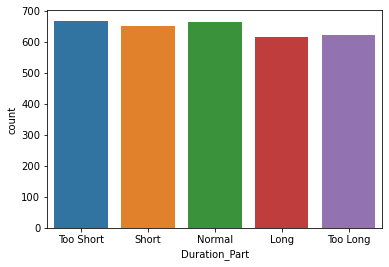

In [26]:
print ("### Average IMDB Ratings of Movies by Length ### ")
print(df_movies.groupby(by = "Duration_Part").agg({"Imdb_Score":"mean"}))
sns.countplot(x = df_movies["Duration_Part"],data = df_movies)
plt.show(block=True)

In [27]:
df_TVshow["Duration"] = [i.replace(" Seasons","") if "Seasons" in i else i.replace(" Season","") for i in df_TVshow["Duration"]]
df_TVshow["Duration"] = df_TVshow["Duration"].astype(int)
df_TVshow["Duration_Part"]= pd.cut(df_TVshow["Duration"],[0,2,4,8,14,20],labels=["1-2 Season","3-4 Season","5-8 Season","8-14 Season","14-20 Season"])


C:\Users\melih.oznalbant\AppData\Local\Temp\ipykernel_20352\182996298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TVshow["Duration"] = [i.replace(" Seasons","") if "Seasons" in i else i.replace(" Season","") for i in df_TVshow["Duration"]]
C:\Users\melih.oznalbant\AppData\Local\Temp\ipykernel_20352\182996298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TVshow["Duration"] = df_TVshow["Duration"].astype(int)
C:\Users\melih.oznalbant\AppData\Local\Temp\ipykernel_20352\182996298.py:3: Setti

### Average IMDB Ratings of TV Shows by Season Number ### 
               Imdb_Score
Duration_Part            
1-2 Season       6.990000
3-4 Season       7.814286
5-8 Season       7.730000
8-14 Season      8.350000
14-20 Season     8.400000


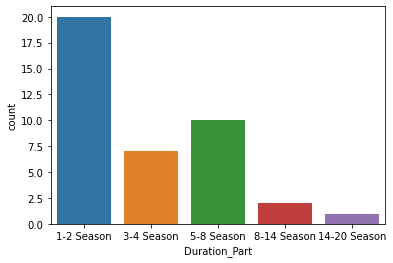

In [28]:
print ("### Average IMDB Ratings of TV Shows by Season Number ### ")
print(df_TVshow.groupby(by = "Duration_Part").agg({"Imdb_Score":"mean"}))
sns.countplot(x = df_TVshow["Duration_Part"],data = df_TVshow)
plt.show(block=True)


In [29]:
# 1. Set Up The Hypothesis

# HO: m1 = m2 = m3 = m4 : There is no difference between IMDB averages according to the number of seasons.

# H1: There is a difference between the IMDB averages according to the season numbers

In [30]:
# 2. Assumption Control

# Normality assumption
# Assumption of homogeneity of variance

# If the assumptions are met, the One Way Anova method is used.
# If the assumptions are not provided, the Kruskal method is used.


In [31]:
## Normality Assumption Control
# H0: Normal distribution assumption is provided.
# H1: The assumption of normal distribution is not provided.

df_TVshow["Duration_Part_Test"]= pd.cut(df_TVshow["Duration"],[0,2,4,8,20],labels=["1-2 Season","3-4 Season","5-8 Season","8-20 Season"])

for season in list(df_TVshow["Duration_Part_Test"].unique()):
    pvalue = shapiro(df_TVshow.loc[df_TVshow["Duration_Part_Test"] == season, "Imdb_Score"])[1]
    print(season, 'p-value: %.4f' % pvalue)

5-8 Season p-value: 0.6037
8-20 Season p-value: -0.0000
3-4 Season p-value: 0.2953
1-2 Season p-value: 0.8915


C:\Users\melih.oznalbant\AppData\Local\Temp\ipykernel_20352\3125553398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TVshow["Duration_Part_Test"]= pd.cut(df_TVshow["Duration"],[0,2,4,8,20],labels=["1-2 Season","3-4 Season","5-8 Season","8-20 Season"])


In [32]:
# Since the p-value for the 8-20 season is less than 0.05, the assumption of normality is not provided.

In [33]:
## Assumption of Homogeneity of Variance Control
# H0: Assumption of variance homogeneity is provided.
# H1: The variance homogeneity assumption is not provided.

test_stat, pvalue = levene(df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "1-2 Season", "Imdb_Score"],
df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "3-4 Season", "Imdb_Score"],
df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "5-8 Season", "Imdb_Score"],
df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "8-20 Season", "Imdb_Score"])


print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 1.5867, p-value = 0.2095


In [34]:
# Since the p-value is greater than 0.05, the assumption of homogeneity of variance is provided.

# However, since the assumption of normality is not provided, nonparametric ANOVA test is applied.

In [35]:
test_stat, pvalue = kruskal(df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "1-2 Season", "Imdb_Score"],
        df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "3-4 Season", "Imdb_Score"],
        df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "5-8 Season", "Imdb_Score"],
        df_TVshow.loc[df_TVshow["Duration_Part_Test"] == "8-20 Season", "Imdb_Score"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 9.9639, p-value = 0.0189


In [36]:
# H0 hypothesis is rejected because the p-value is less than 0.05. This means that there is a statistically significant difference in IMDB scores for TV Shows according to the number of seasons.